## Introduction
Twitter Sentiment Analysis Dataset
Overview
This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.



### 1. Importing Libraries:
Let’s start by importing the required libraries for data analysis and visualization:

In [1]:
#important library we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 2. Loading the Dataset:
The Titanic dataset is available in the Seaborn library, so we can load it directly into a DataFrame:


In [3]:
#load all of data :
twitts_train = pd.read_csv("twitter_training.csv")
twitts_valid = pd.read_csv("twitter_validation.csv")

At first put name for each column:

At the second step add two data frame to the one dataframe to analysis

In [4]:
column_name=['tweetID','entity','sentiment','tweet_content']
twitts_train.columns=column_name
twitts_valid.columns=column_name
df=pd.concat([twitts_train,twitts_valid],ignore_index=False)
df.head()

,tweetID,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


### 3. Exploring the Data:
To gain initial insights into the dataset, we can perform some basic exploratory operations:

In [5]:
# Display the first few rows of the dataset
display(df.head())

,tweetID,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
# Check the dimensions of the dataset
display(df.shape)
print('*'*25)

# Get summary statistics of numerical variables
display(df.describe())

# Check the data types of variables
print(f"{'*'*25} \n {df.dtypes}")

# Check for missing values
print(f"{'*'*25} \n {df.isnull().sum()}")


(75680, 4)

*************************


,tweetID
count,75680.000000
mean,6432.673401
std,3740.247541
min,1.000000
25%,3196.000000
50%,6423.500000
75%,9602.000000
max,13200.000000


************************* 
 tweetID           int64
entity           object
sentiment        object
tweet_content    object
dtype: object
************************* 
 tweetID            0
entity             0
sentiment          0
tweet_content    686
dtype: int64


### 4. Data Cleaning:
Data cleaning is an essential step in EDA. We must handle missing values, outliers, and inconsistencies in the dataset. Some common data-cleaning tasks include:

In [7]:
df.sentiment.value_counts()

Negative      22808
Positive      21108
Neutral       18603
Irrelevant    13161
Name: sentiment, dtype: int64

In [8]:
df

,tweetID,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


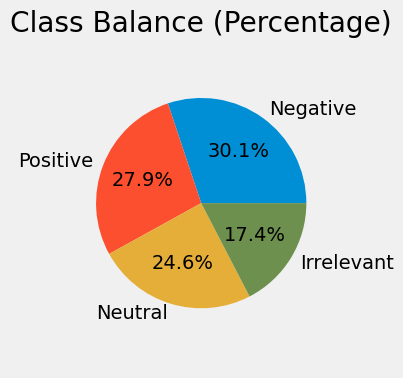

In [9]:
# Create the pie chart using matplotlib
plt.figure(figsize=(4, 4))
plt.pie(df.sentiment.value_counts(),labels=df.sentiment.value_counts().index,autopct='%1.1f%%')
plt.title('Class Balance (Percentage)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [10]:
df['sentiment']=df['sentiment'].replace(to_replace=r'Irrelevant', value='Neutral', regex=True)

In [11]:
df.sentiment.value_counts()

Neutral     31764
Negative    22808
Positive    21108
Name: sentiment, dtype: int64

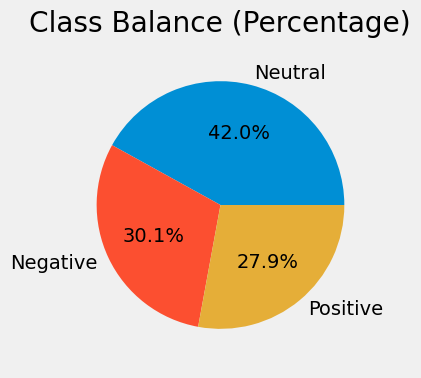

In [12]:
# Create the pie chart using matplotlib
plt.figure(figsize=(4, 4))
plt.pie(df.sentiment.value_counts(),labels=df.sentiment.value_counts().index,autopct='%1.1f%%')
plt.title('Class Balance (Percentage)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [13]:
# Check for missing values
missing_df = df.isnull().sum()

# Check for duplicate rows
duplicates_df = df.duplicated().sum()

print(missing_df)
print(duplicates_df)

tweetID            0
entity             0
sentiment          0
tweet_content    686
dtype: int64
3216


Remove the all null values and duplicated values:

Then check for the cleaning:

In [14]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
print("null values:","\n",df.isnull().sum())
print("duplicated values:",df.duplicated().sum())

null values: 
 tweetID          0
entity           0
sentiment        0
tweet_content    0
dtype: int64
duplicated values: 0


In [15]:
df['entity'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [16]:
df['entity'].value_counts()

TomClancysRainbowSix                 2349
CallOfDuty                           2333
Verizon                              2330
MaddenNFL                            2326
Microsoft                            2317
WorldOfCraft                         2317
LeagueOfLegends                      2314
TomClancysGhostRecon                 2305
ApexLegends                          2305
NBA2K                                2304
Facebook                             2300
johnson&johnson                      2274
Amazon                               2270
Battlefield                          2269
CallOfDutyBlackopsColdWar            2256
FIFA                                 2256
Dota2                                2240
Hearthstone                          2237
Overwatch                            2231
HomeDepot                            2221
Borderlands                          2221
GrandTheftAuto(GTA)                  2218
Xbox(Xseries)                        2216
Nvidia                            

 For above values it is observed that all entity are well distributed

tweetID is not important so much, So we can drop it

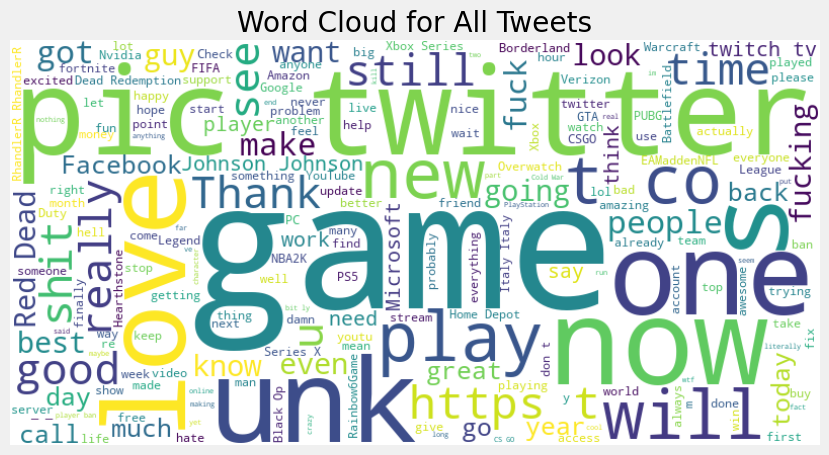

In [17]:
from wordcloud import WordCloud

# Generate the word cloud for the entire training dataset
all_text = " ".join(tweet for tweet in df[df.columns[3]])
wordcloud_all = WordCloud(background_color='white', width=800, height=400).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for All Tweets')
plt.show()

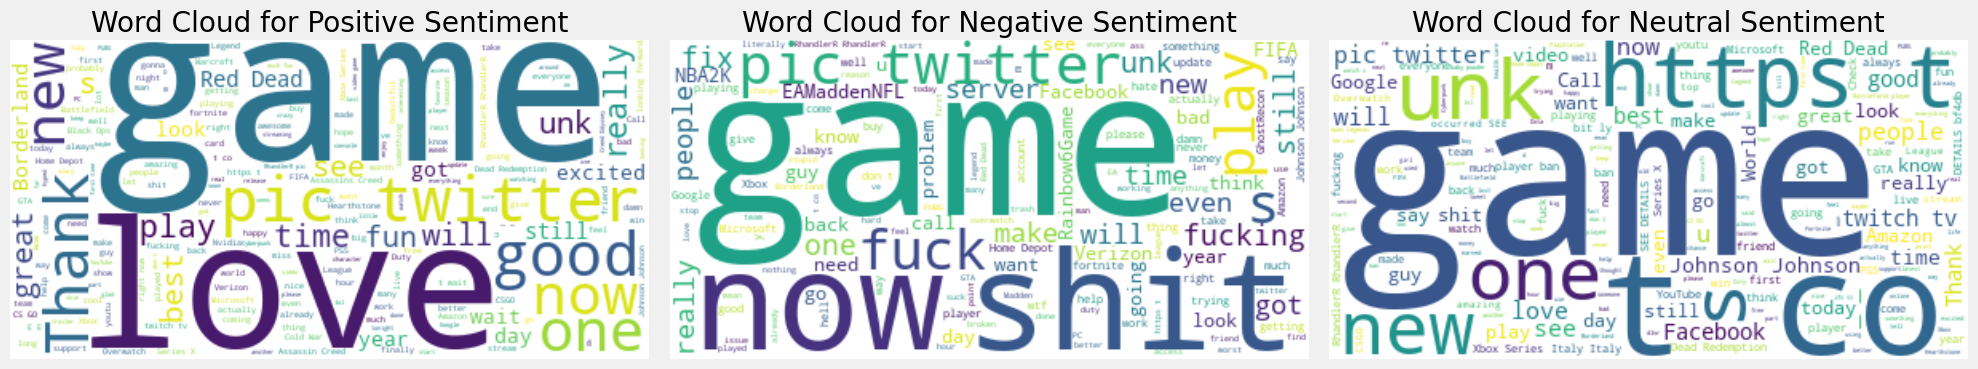

In [18]:
# Initialize sentiment categories
sentiments = ['Positive', 'Negative', 'Neutral']

# Set up the plots
fig, axs = plt.subplots(1,3, figsize=(20,20))

# Generate and plot word clouds for each sentiment
for sentiment, ax in zip(sentiments, axs.ravel()):
    sentiment_text = " ".join(tweet for tweet in df[df[df.columns[2]] == sentiment][df.columns[3]])
    wordcloud_sentiment = WordCloud(background_color='white', width=400, height=200).generate(sentiment_text)
    
    ax.imshow(wordcloud_sentiment, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Word Cloud for {sentiment} Sentiment')

plt.tight_layout()
plt.show()

In [19]:
df = df.iloc[:,1:]
df

,entity,sentiment,tweet_content
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...
987,LeagueOfLegends,Neutral,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...
988,HomeDepot,Positive,Thank you to Matching funds Home Depot RW paym...
990,CallOfDuty,Neutral,Late night stream with the boys! Come watch so...
994,GrandTheftAuto(GTA),Neutral,⭐️ Toronto is the arts and culture capital of ...


### Encoding Categorical variable

Replacing sentiment (['Neutral':0,'Positive':1,'Negative':2])

In [20]:
df['sentiment'] = df['sentiment'].map({'Neutral':0,'Positive':1,'Negative':2})

### Feature Engineering on dataset

In [21]:
df["tweet_content"] = df["tweet_content"].apply(lambda text : nltk.word_tokenize(text))
df.head()

,entity,sentiment,tweet_content
0,Borderlands,1,"[I, am, coming, to, the, borders, and, I, will..."
1,Borderlands,1,"[im, getting, on, borderlands, and, i, will, k..."
2,Borderlands,1,"[im, coming, on, borderlands, and, i, will, mu..."
3,Borderlands,1,"[im, getting, on, borderlands, 2, and, i, will..."
4,Borderlands,1,"[im, getting, into, borderlands, and, i, can, ..."


In [22]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
stopwords = set(stopwords.words("english"))

In [24]:
df["tweet_content"] = df["tweet_content"].apply(lambda text : [word for word in text if word.lower() not in stopwords])
df.head()

,entity,sentiment,tweet_content
0,Borderlands,1,"[coming, borders, kill, ,]"
1,Borderlands,1,"[im, getting, borderlands, kill, ,]"
2,Borderlands,1,"[im, coming, borderlands, murder, ,]"
3,Borderlands,1,"[im, getting, borderlands, 2, murder, ,]"
4,Borderlands,1,"[im, getting, borderlands, murder, ,]"


In [25]:
df["tweet_content"] = df["tweet_content"].apply(lambda x : " ".join(x))

In [26]:
df["new_review"] = df["entity"] + " - " + df["tweet_content"]
df = df.drop(columns=['entity','tweet_content'])
df

,sentiment,new_review
0,1,"Borderlands - coming borders kill ,"
1,1,"Borderlands - im getting borderlands kill ,"
2,1,"Borderlands - im coming borderlands murder ,"
3,1,"Borderlands - im getting borderlands 2 murder ,"
4,1,"Borderlands - im getting borderlands murder ,"
...,...,...
987,0,LeagueOfLegends - ♥️ Suikoden 2 1️⃣ Alex Kidd ...
988,1,HomeDepot - Thank Matching funds Home Depot RW...
990,0,CallOfDuty - Late night stream boys ! Come wat...
994,0,GrandTheftAuto(GTA) - ⭐️ Toronto arts culture ...


### Feature extraction

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [28]:
vectorizer = TfidfVectorizer(max_features=1000)  # Example parameters, adjust as needed
x = vectorizer.fit_transform(df['new_review'])
y = df['sentiment']


In [29]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: sentiment, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

# 9. Classification Using ML Models

## MiltinomialNB Classifier

In [32]:
# Model selection and training
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()  # Example, you can replace with any other model
model.fit(x_train, y_train)


MultinomialNB()

In [33]:
from sklearn.metrics import accuracy_score,classification_report
# Model evaluation
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6323121707790408
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.75      0.67      6182
           1       0.64      0.49      0.55      3938
           2       0.67      0.60      0.63      4308

    accuracy                           0.63     14428
   macro avg       0.64      0.61      0.62     14428
weighted avg       0.64      0.63      0.63     14428



In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


# Define models
models = {
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n{report}")
    print("="*50)


Training Support Vector Machine...
Support Vector Machine Accuracy: 0.8945106736900471
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6182
           1       0.90      0.85      0.87      3938
           2       0.91      0.89      0.90      4308

    accuracy                           0.89     14428
   macro avg       0.90      0.89      0.89     14428
weighted avg       0.89      0.89      0.89     14428

Training Logistic Regression...
Logistic Regression Accuracy: 0.6614222345439423
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69      6182
           1       0.64      0.57      0.60      3938
           2       0.68      0.66      0.67      4308

    accuracy                           0.66     14428
   macro avg       0.66      0.65      0.65     14428
weighted avg       0.66      0.66   

In [35]:
# Using pipeline for prediction

In [36]:
x= df.iloc[:,1]
y = df.iloc[:,0]

In [37]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

In [38]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('RandomForest', (RandomForestClassifier()))          
])


In [39]:
clf.fit(x_train, y_train)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('RandomForest', RandomForestClassifier())])

In [40]:
pred = clf.predict(x_test)
print(accuracy_score(y_test, pred))

0.9376906016079845


In [41]:
# Here we got an accuracy of 94.49%

In [42]:
# Prediction example
new_reviews = ["This game is amazing!", "I don't like this game."]
predictions = clf.predict(new_reviews)
print("Predictions:", predictions)


Predictions: [1 2]
